In this notebook, I perform clustering tasks to understand what are the types of community-level inflow migration. 


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, decomposition
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Data Preparation - More Feature Engineering Using Clustering
In this section, I gathered necessary feature data from the created dataset. My goal is to detect migration matterns using community inflow and outflow data. 

In [5]:
# Load dataset
df = pd.read_csv('training_data_features.csv')

In [6]:
df_18 = df[df['year'] == 2018]
df_23 = df[df['year'] == 2023]
df_18

,pop,hh,state,county,tract,FIPS,year,rail,total_li,pctch_real_mhval_sl,...,prop_hhinc_50000,prop_hhinc_60000,prop_hhinc_75000,prop_hhinc_100000,prop_hhinc_125000,prop_hhinc_150000,prop_hhinc_200000,prop_hhinc_201000,prop_bd,prop_grad
1906,2344.0,866.0,17,197,882900,17197882900,2018,0.0,259.0,0.010385,...,0.056582,0.050808,0.117783,0.132794,0.092379,0.049654,0.026559,0.025404,0.041809,0.029863
1907,3759.0,1183.0,17,197,883000,17197883000,2018,0.0,438.0,0.127786,...,0.060017,0.138631,0.090448,0.065934,0.058326,0.049873,0.051564,0.005072,0.044693,0.025805
1908,3726.0,1099.0,17,197,880111,17197880111,2018,0.0,104.0,0.090727,...,0.058235,0.035487,0.123749,0.272066,0.140127,0.069154,0.043676,0.015469,0.117821,0.035695
1909,5692.0,2429.0,17,197,883602,17197883602,2018,0.0,310.0,-0.173610,...,0.036641,0.114039,0.224784,0.092631,0.092631,0.107452,0.108687,0.039111,0.123507,0.067639
1910,2756.0,1439.0,17,197,883803,17197883803,2018,0.0,652.0,-0.005649,...,0.061154,0.079917,0.123697,0.083391,0.011814,0.065323,0.013204,0.004864,0.099057,0.048258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,3943.0,1056.0,17,31,301701,17031301701,2018,0.0,559.0,0.097179,...,0.012311,0.091856,0.081439,0.021780,0.105114,0.011364,0.030303,0.000000,0.037281,0.011920
3811,4387.0,1089.0,17,31,301702,17031301702,2018,0.0,470.0,-0.066508,...,0.078972,0.089991,0.067034,0.100092,0.063361,0.008264,0.015611,0.008264,0.024618,0.005015
3812,3625.0,1052.0,17,31,301801,17031301801,2018,1.0,537.0,0.077217,...,0.000000,0.074144,0.074144,0.079848,0.038023,0.084601,0.000000,0.000000,0.041103,0.013517
3813,3509.0,866.0,17,31,301802,17031301802,2018,1.0,406.0,-0.082327,...,0.038106,0.101617,0.056582,0.114319,0.039261,0.013857,0.012702,0.000000,0.049302,0.007125


In [7]:
df.columns # there are a lot of variables on migration; we are only interested in variables on in-flow migration, and we want to reduce their dimension and detect underlying patterns in them

Index(['pop', 'hh', 'state', 'county', 'tract', 'FIPS', 'year', 'rail',
       'total_li', 'pctch_real_mhval_sl', 'per_ch_rent_sl', 'lostli',
       'more_ind_inc', 'pctch_ind_inc', 'log_medhinc', 'log_mhval',
       'log_mrent', 'log_iinc', 'price_rent_ratio', 'white_prop', 'ohu_prop',
       'rhu_prop', 'pro_old_build', 'prop_lostli', 'prop_mov_low_inc',
       'prop_mov_med_inc', 'prop_mov_high_inc', 'prop_mov_wc_9000',
       'prop_mov_oc_9000', 'prop_mov_os_9000', 'prop_mov_fa_9000',
       'prop_mov_wc_15000', 'prop_mov_oc_15000', 'prop_mov_os_15000',
       'prop_mov_fa_15000', 'prop_mov_wc_25000', 'prop_mov_oc_25000',
       'prop_mov_os_25000', 'prop_mov_fa_25000', 'prop_mov_wc_35000',
       'prop_mov_oc_35000', 'prop_mov_os_35000', 'prop_mov_fa_35000',
       'prop_mov_wc_50000', 'prop_mov_oc_50000', 'prop_mov_os_50000',
       'prop_mov_fa_50000', 'prop_mov_wc_65000', 'prop_mov_oc_65000',
       'prop_mov_os_65000', 'prop_mov_fa_65000', 'prop_mov_wc_75000',
       'prop_mov

In [8]:
# subset to dataset with only migration features
mi_vars = ['prop_mov_wc_w_income', 'prop_mov_oc_w_income', 'prop_mov_os_w_income',
       'prop_mov_fa_w_income', 'prop_mov_wc_9000', 'prop_mov_oc_9000',
       'prop_mov_os_9000', 'prop_mov_fa_9000', 'prop_mov_wc_15000',
       'prop_mov_oc_15000', 'prop_mov_os_15000', 'prop_mov_fa_15000',
       'prop_mov_wc_25000', 'prop_mov_oc_25000', 'prop_mov_os_25000',
       'prop_mov_fa_25000', 'prop_mov_wc_35000', 'prop_mov_oc_35000',
       'prop_mov_os_35000', 'prop_mov_fa_35000', 'prop_mov_wc_50000',
       'prop_mov_oc_50000', 'prop_mov_os_50000', 'prop_mov_fa_50000',
       'prop_mov_wc_65000', 'prop_mov_oc_65000', 'prop_mov_os_65000',
       'prop_mov_fa_65000', 'prop_mov_wc_75000', 'prop_mov_oc_75000',
       'prop_mov_os_75000', 'prop_mov_fa_75000', 'prop_mov_wc_76000_more',
       'prop_mov_oc_76000_more', 'prop_mov_os_76000_more',
       'prop_mov_fa_76000_more']
df_m_18 = df_18[mi_vars]
df_m_23 = df_23[mi_vars]
df_m = df[mi_vars]


In [9]:
# take a look at all columns -
# we have proportion of all inflow migration with difference income levels (those start with 'prop_mov_') as features
# this allow us to capture the inflow pattern of population within a given neighborhood - what is the pattern of individuals that move in to a neighborhood?
df_m_18.columns

Index(['prop_mov_wc_w_income', 'prop_mov_oc_w_income', 'prop_mov_os_w_income',
       'prop_mov_fa_w_income', 'prop_mov_wc_9000', 'prop_mov_oc_9000',
       'prop_mov_os_9000', 'prop_mov_fa_9000', 'prop_mov_wc_15000',
       'prop_mov_oc_15000', 'prop_mov_os_15000', 'prop_mov_fa_15000',
       'prop_mov_wc_25000', 'prop_mov_oc_25000', 'prop_mov_os_25000',
       'prop_mov_fa_25000', 'prop_mov_wc_35000', 'prop_mov_oc_35000',
       'prop_mov_os_35000', 'prop_mov_fa_35000', 'prop_mov_wc_50000',
       'prop_mov_oc_50000', 'prop_mov_os_50000', 'prop_mov_fa_50000',
       'prop_mov_wc_65000', 'prop_mov_oc_65000', 'prop_mov_os_65000',
       'prop_mov_fa_65000', 'prop_mov_wc_75000', 'prop_mov_oc_75000',
       'prop_mov_os_75000', 'prop_mov_fa_75000', 'prop_mov_wc_76000_more',
       'prop_mov_oc_76000_more', 'prop_mov_os_76000_more',
       'prop_mov_fa_76000_more'],
      dtype='object')

In [10]:
df_m_18.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1909 entries, 1906 to 3814
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   prop_mov_wc_w_income    1909 non-null   float64
 1   prop_mov_oc_w_income    1909 non-null   float64
 2   prop_mov_os_w_income    1909 non-null   float64
 3   prop_mov_fa_w_income    1909 non-null   float64
 4   prop_mov_wc_9000        1909 non-null   float64
 5   prop_mov_oc_9000        1909 non-null   float64
 6   prop_mov_os_9000        1909 non-null   float64
 7   prop_mov_fa_9000        1909 non-null   float64
 8   prop_mov_wc_15000       1909 non-null   float64
 9   prop_mov_oc_15000       1909 non-null   float64
 10  prop_mov_os_15000       1909 non-null   float64
 11  prop_mov_fa_15000       1909 non-null   float64
 12  prop_mov_wc_25000       1909 non-null   float64
 13  prop_mov_oc_25000       1909 non-null   float64
 14  prop_mov_os_25000       1909 non-null   fl

In [11]:
# define X for clustering
X = df_m_18.copy()

# Exploring Possible Patterns Using PCA

We want to prioritize interpretability, and determine the lowest number of dimensions. 

In [12]:
pca = decomposition.PCA(n_components=0.9)
pca.fit(X)
X_pca = pca.transform(X)
print(len(pca.explained_variance_ratio_))


6


We have 6 dimensions - which is a reasonable number, and much smaller than our original 36 features. Let's plot them to see their accumulated variance.

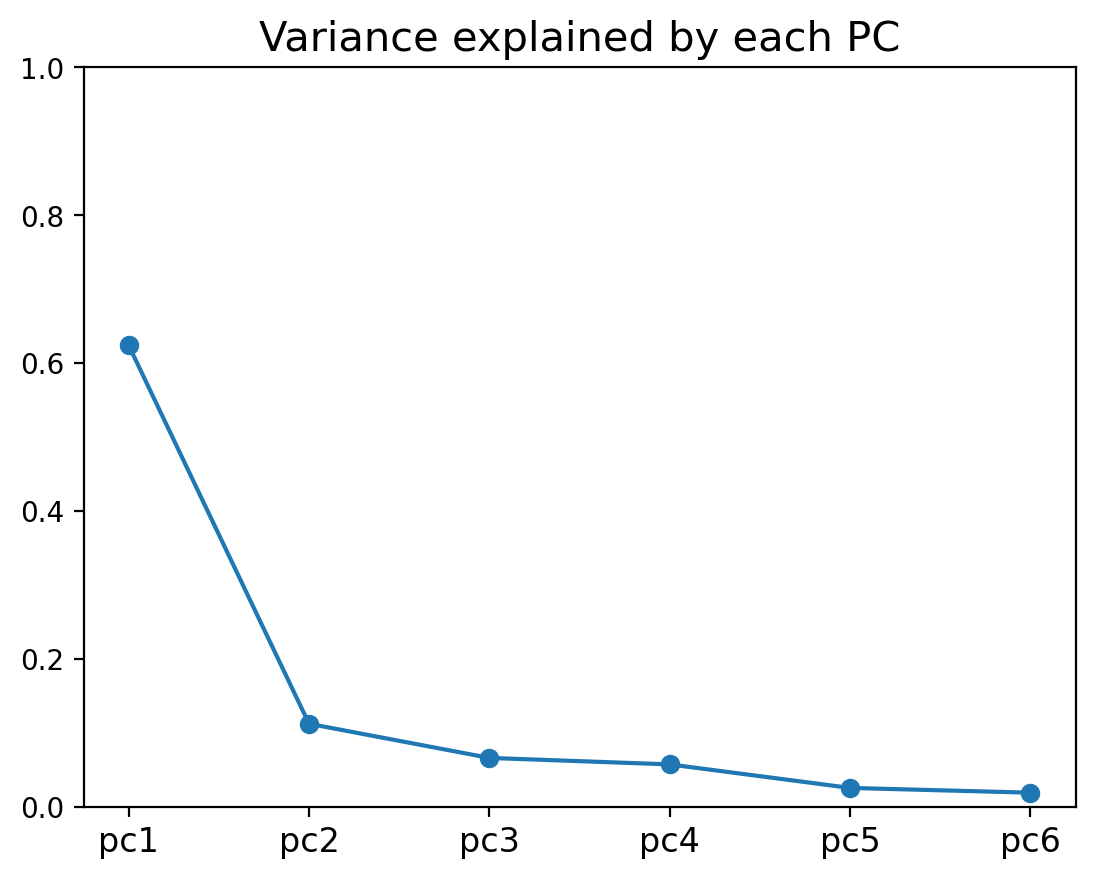

In [46]:
xt = [i for i in range(6)]
xlabs = [f'pc{i+1}' for i in range(6)]
plt.plot(pca.explained_variance_ratio_,'o-')
plt.xticks(xt,xlabs, fontsize=12)
plt.ylim(0,1)
plt.title('Variance explained by each PC', fontsize=15)
plt.show()

[0.6240125167715023, 0.7360080408535803, 0.8018073094830344, 0.8588303051247088, 0.8840359024831957, 0.9028059962392894]


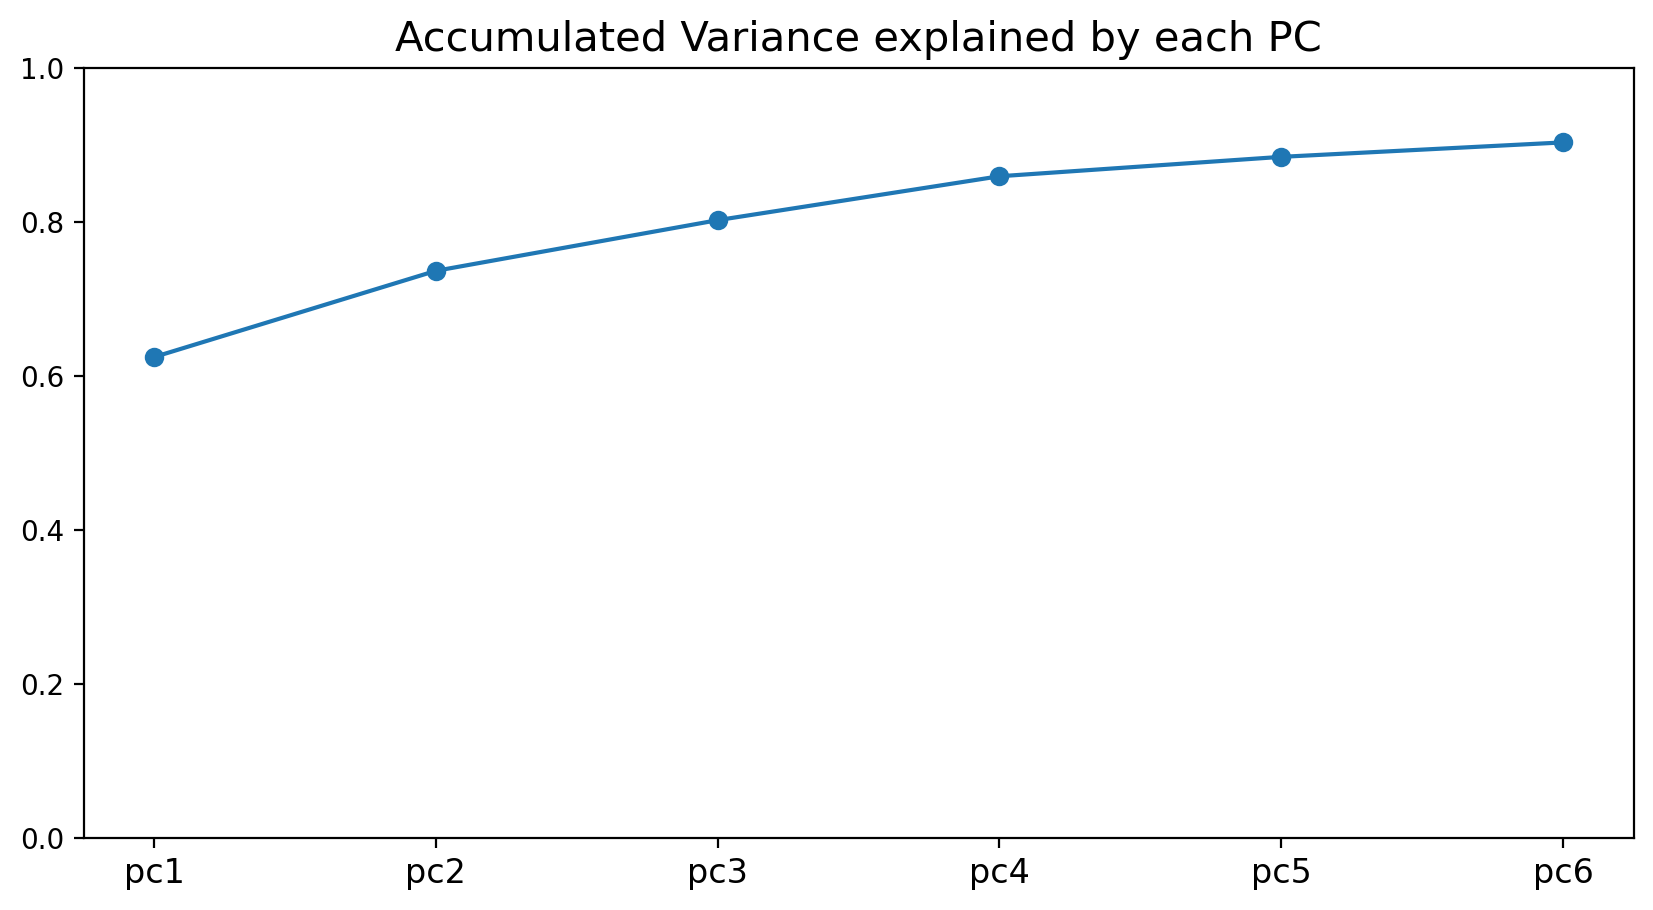

In [47]:
accu_variance = []
total = 0

for value in pca.explained_variance_ratio_:
    total += value
    accu_variance.append(total)

print(accu_variance)
xt = [i for i in range(6)]
xlabs = [f'pc{i+1}' for i in range(6)]
plt.figure(figsize=(10,5))
plt.plot(accu_variance, 'o-')
plt.xticks(xt, xlabs, fontsize=12)
plt.ylim(0,1)
plt.title('Accumulated Variance explained by each PC', fontsize=15)
plt.show()

We can see that reducing the dimension to 6 accounts for a decent amount of interpretability. Now, we look at which features contributes the most to each pc. 

In [15]:
feature_names = X.columns.tolist()

# Create DataFrame from components
components_df = pd.DataFrame(
    data=pca.components_.T,  # Transpose to get features as rows, PCs as columns
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=feature_names
)
components_df

,PC1,PC2,PC3,PC4,PC5,PC6
prop_mov_wc_w_income,0.903923,-0.172464,0.118740,-0.135051,-0.005370,-0.023184
prop_mov_oc_w_income,0.005229,0.667485,0.561838,-0.330161,0.066116,0.007863
prop_mov_os_w_income,0.228162,0.523279,-0.273327,0.557253,-0.301847,0.037936
prop_mov_fa_w_income,0.045128,0.098268,-0.022165,0.114979,0.016221,0.036817
prop_mov_wc_9000,0.142291,-0.146214,0.397895,0.514351,0.581726,-0.103258
prop_mov_oc_9000,0.008033,0.145461,0.146365,0.047583,0.035899,-0.013989
prop_mov_os_9000,0.044949,0.164152,0.015443,0.333178,-0.068845,-0.008672
prop_mov_fa_9000,0.009087,0.034389,0.008472,0.063473,0.002233,0.005268
prop_mov_wc_15000,0.056557,-0.092046,0.123358,0.045354,-0.065644,0.067392
prop_mov_oc_15000,0.001477,0.039618,0.038224,-0.018105,-0.004419,-0.005018


We provide some interpretation on the PCs. 

(All PCs are in-migration)

**PC1: LOCAL MIGRATION**
- Extremely high loading on overall within-county migration; moderate loading on within-county high-income migration

**PC2: EXTERNAL MIGRATION**
- Strongly driven by out-of-state and out-of-county migration and out-of-state migration

**PC3: REMOTE LOW-INCOME MIGRATION VS. LOCAL HIGH-INCOME MIGRATION**
- Positive loadings on low-income migration ($9K, 0.40)
- Positive loading on out-of-county migration (0.56)
- Strong negative loading on $76K+ within-county migration (-0.49)
- Contrasts areas with low-income in-migration versus high-income in-migration

**PC4: LOW-INCOME MIGRATION DESTINATION**
- Strong positive loadings on $9K within-county (0.51) and out-of-state migration (0.56)
- Negative loadings on high-income migration categories
- Areas with significant low-income migration from both local and distant sources

**PC5: INCOME EXTREMES**
- High positive loading on $9K within-county (0.58) and $76K+ within-county (0.47)
- Strong negative loadings on middle-income migration
- Captures areas with both very low and very high income in-migration
- This is interesting because this might indicate middle-class domintated destinations with many low-income workers

**PC6: LOCAL LOW-INCOME MIGRATION VS. LOCAL MODERATE-INCOME MIGRATION**
- Very high positive loading on $25K within-county (0.68); strong negative loading on $50K within-county (-0.52)


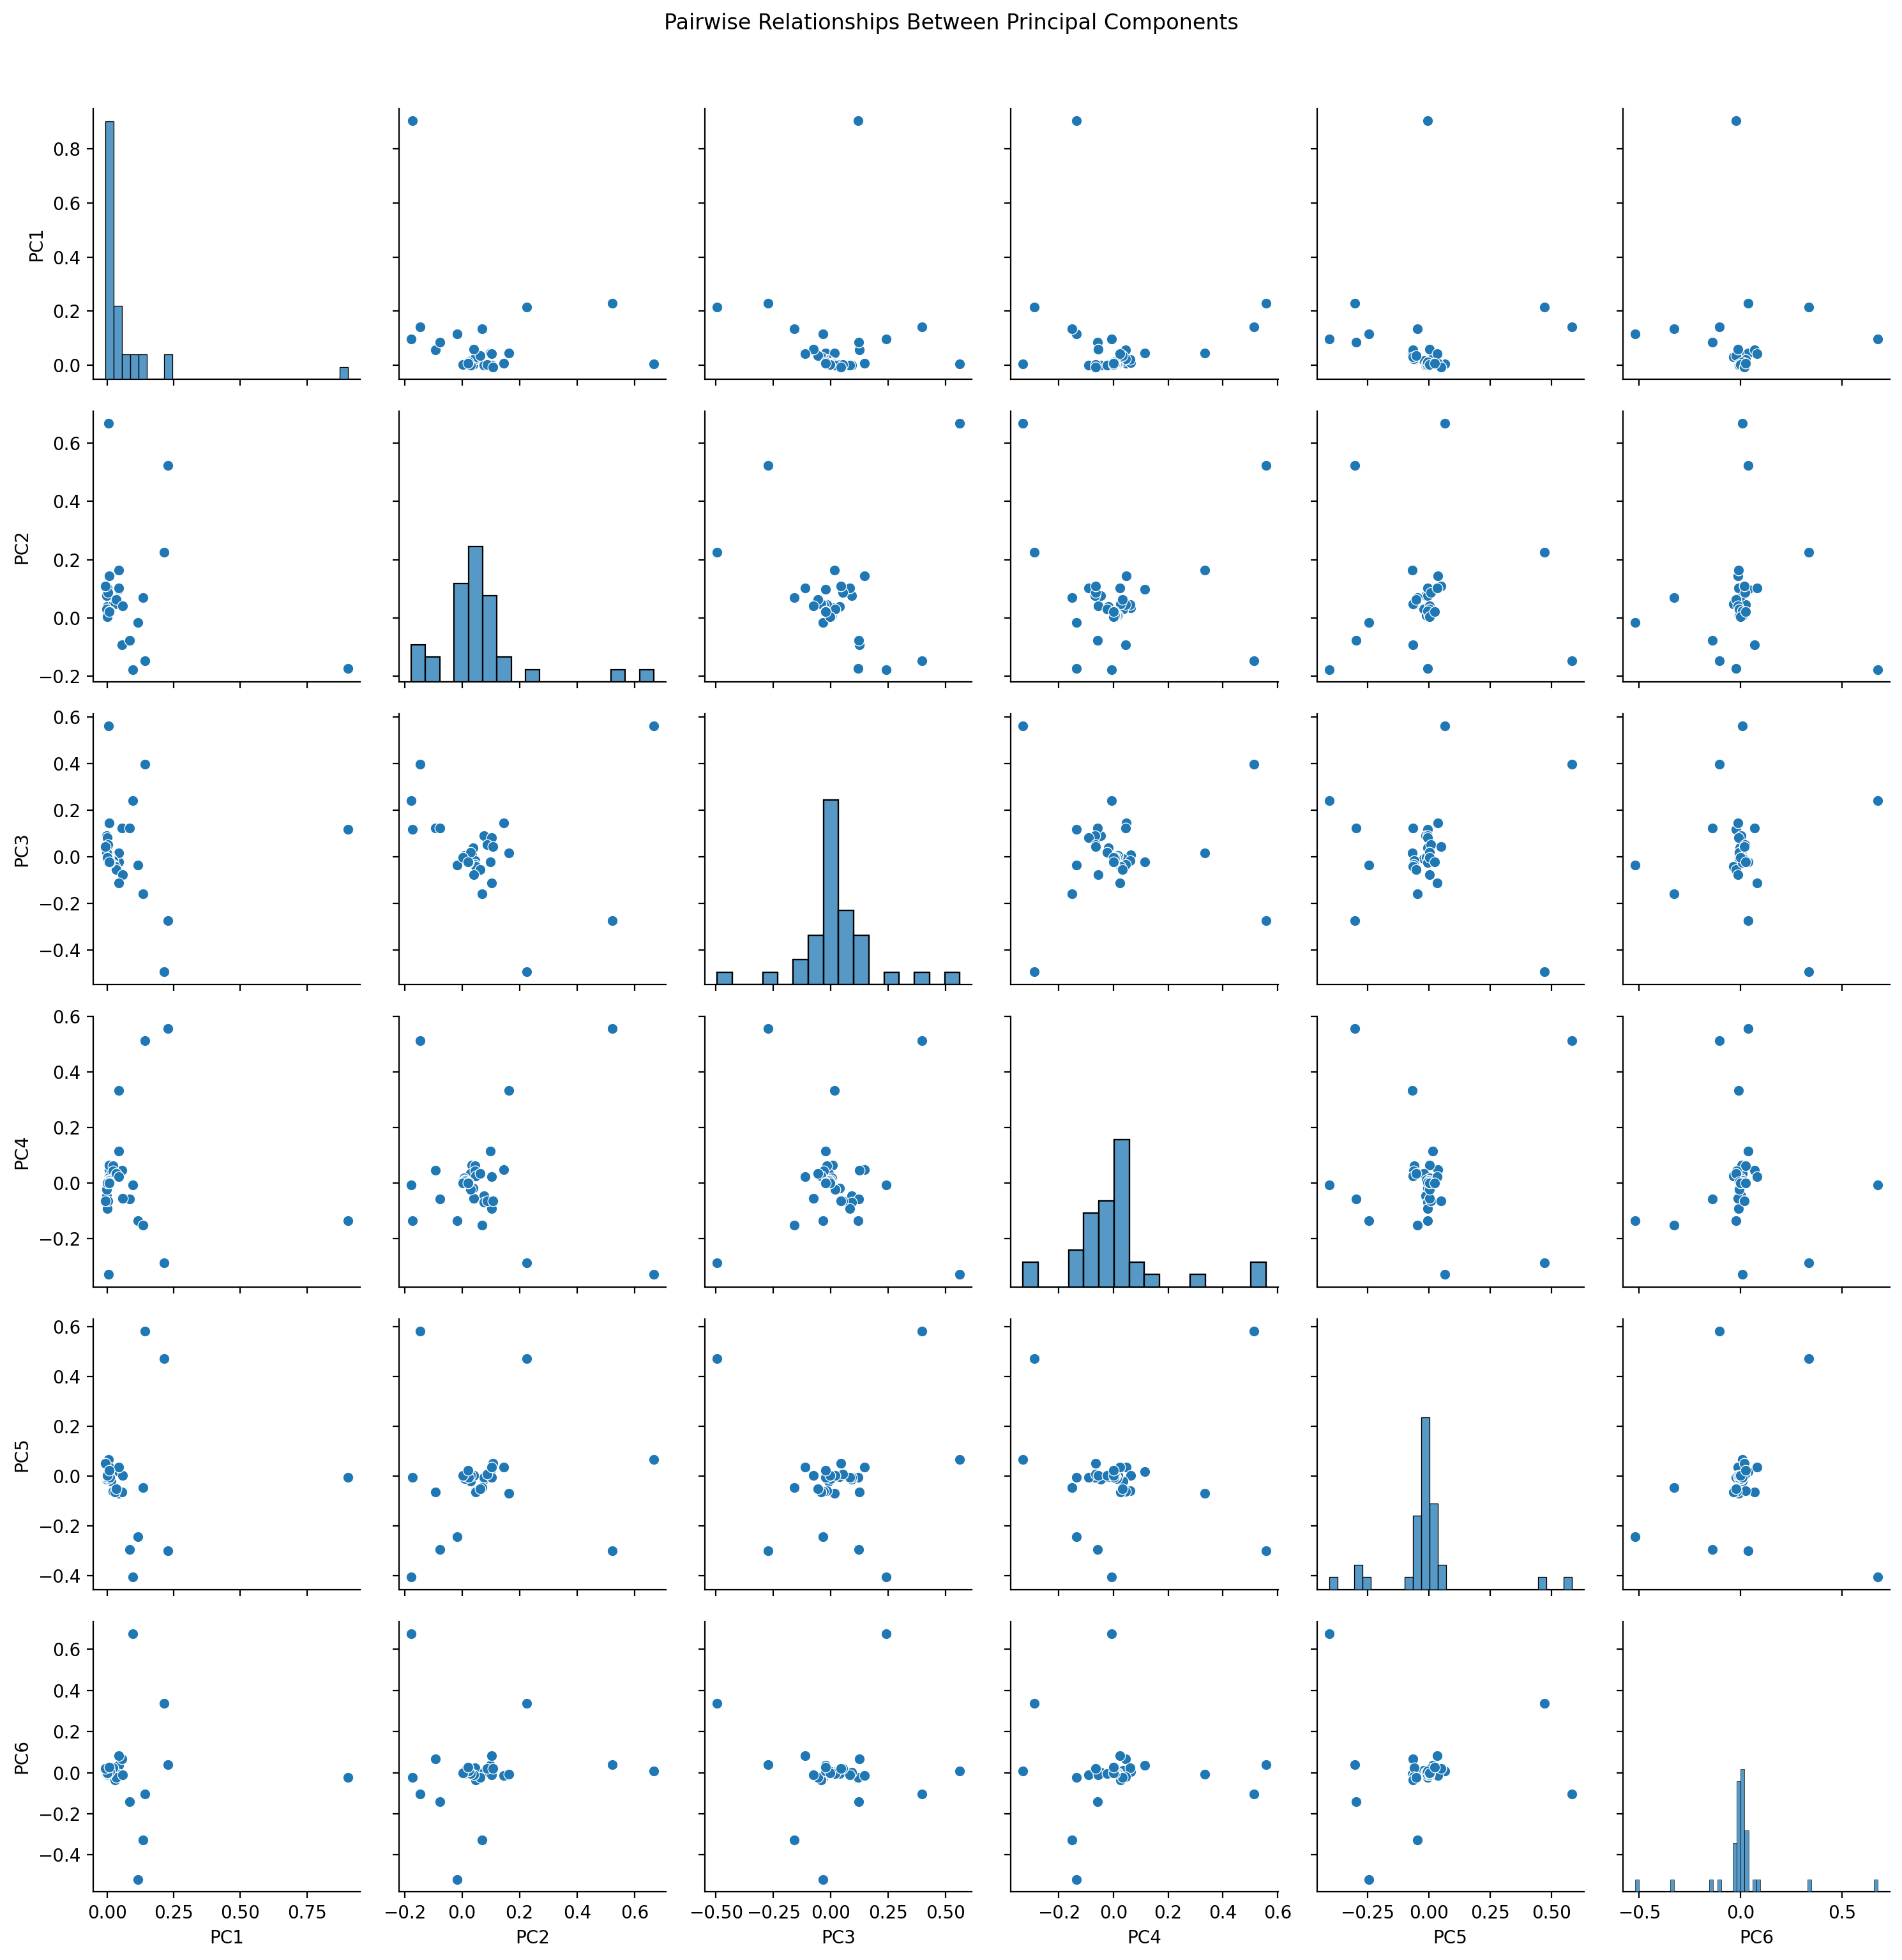

In [16]:
# Calculate cluster centroids in PC space
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your PC data is in a DataFrame called pc_df
# with columns named 'PC1', 'PC2', etc.

# Create a pairplot to visualize relationships between all pairs of PCs
sns.pairplot(components_df)
plt.suptitle('Pairwise Relationships Between Principal Components', y=1.02)
plt.tight_layout()
plt.show()

We do not observe obvious linear relationships between the PC pairs, which is good - it means we have successfully captured different aspects of our data. 

# Clustering

## K-means

From the results, we can see that there are different migration characteristics, both in terms of geographic origins and in terms of income. We can use these PCs for clustering. 

In [17]:
def plot_elbow_silhouette(data, rand_state):
    # Using the elbow method to find optimal k for K-means
    inertia = []
    silhouette_scores = []
    range_n_clusters = range(2, 15)


    for n_clusters in range_n_clusters:
        # K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=rand_state, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        
        # Inertia (for elbow method)
        inertia.append(kmeans.inertia_)

        # Silhouette score
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

    # Plot elbow method results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range_n_clusters, inertia, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # Plot silhouette scores
    plt.figure(figsize=(8, 5))
    plt.plot(list(range_n_clusters), silhouette_scores, marker='o')
    plt.title("Silhouette Scores for Different Numbers of Clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Average Silhouette Score")
    plt.show()

For n_clusters = 2, the average silhouette_score is : 0.498
For n_clusters = 3, the average silhouette_score is : 0.370
For n_clusters = 4, the average silhouette_score is : 0.245
For n_clusters = 5, the average silhouette_score is : 0.262
For n_clusters = 6, the average silhouette_score is : 0.265
For n_clusters = 7, the average silhouette_score is : 0.246
For n_clusters = 8, the average silhouette_score is : 0.253
For n_clusters = 9, the average silhouette_score is : 0.241
For n_clusters = 10, the average silhouette_score is : 0.230
For n_clusters = 11, the average silhouette_score is : 0.206
For n_clusters = 12, the average silhouette_score is : 0.210
For n_clusters = 13, the average silhouette_score is : 0.209
For n_clusters = 14, the average silhouette_score is : 0.207


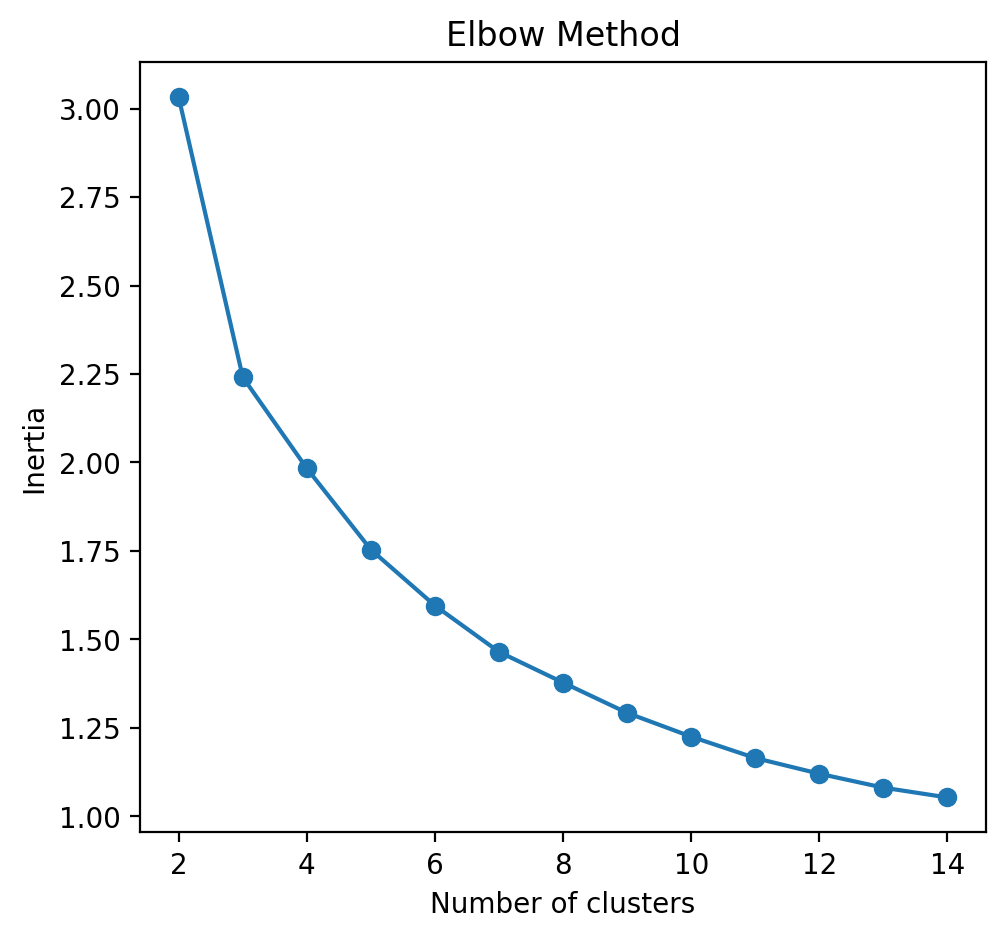

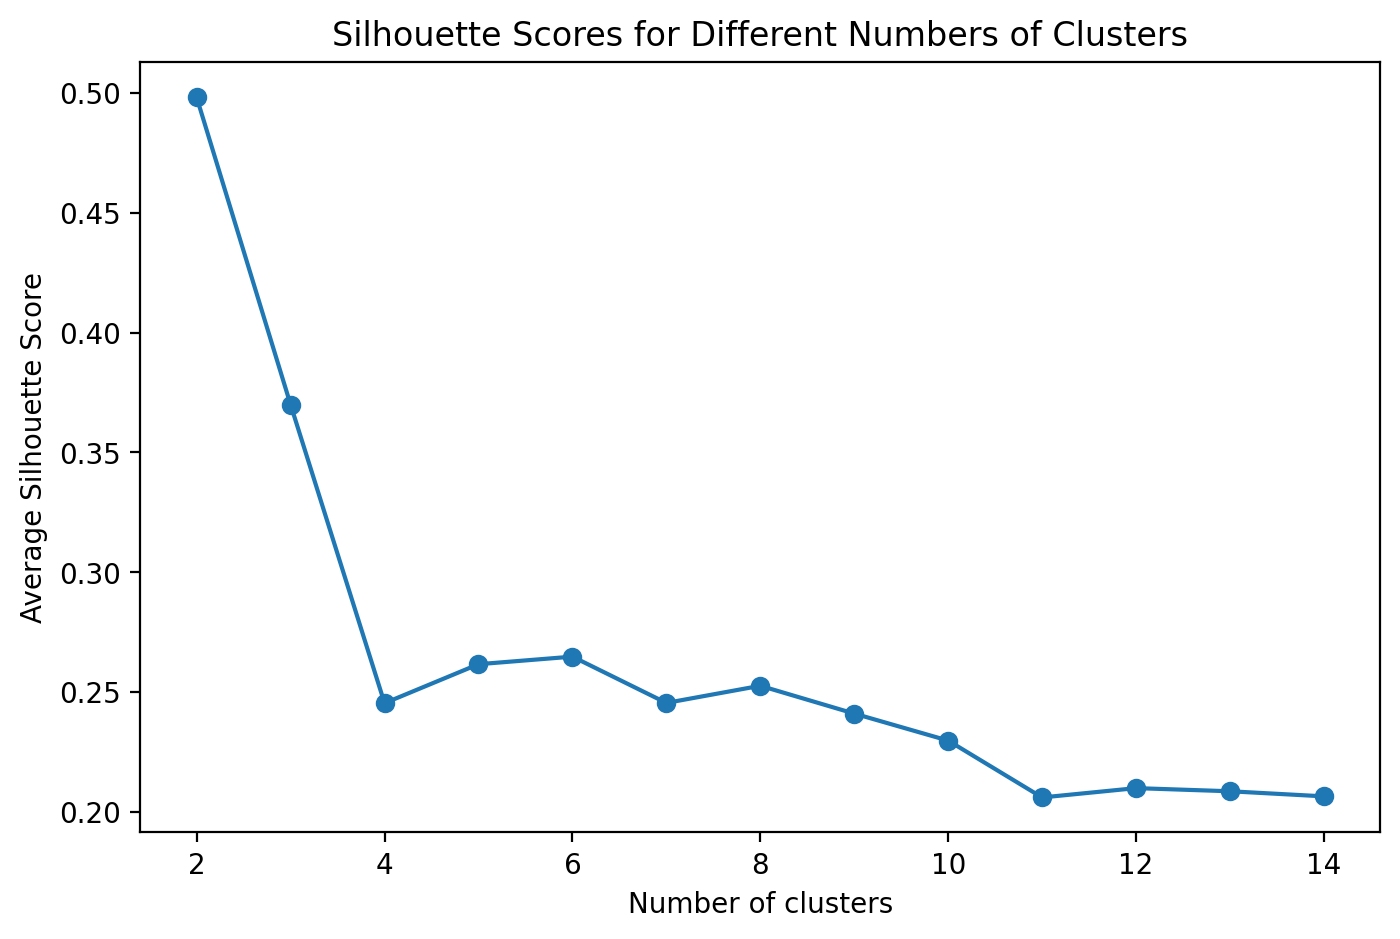

In [18]:
plot_elbow_silhouette(X_pca, 42)

For n_clusters = 2, the average silhouette_score is : 0.498
For n_clusters = 3, the average silhouette_score is : 0.370
For n_clusters = 4, the average silhouette_score is : 0.244
For n_clusters = 5, the average silhouette_score is : 0.262
For n_clusters = 6, the average silhouette_score is : 0.265
For n_clusters = 7, the average silhouette_score is : 0.246
For n_clusters = 8, the average silhouette_score is : 0.245
For n_clusters = 9, the average silhouette_score is : 0.239
For n_clusters = 10, the average silhouette_score is : 0.235
For n_clusters = 11, the average silhouette_score is : 0.207
For n_clusters = 12, the average silhouette_score is : 0.210
For n_clusters = 13, the average silhouette_score is : 0.213
For n_clusters = 14, the average silhouette_score is : 0.212


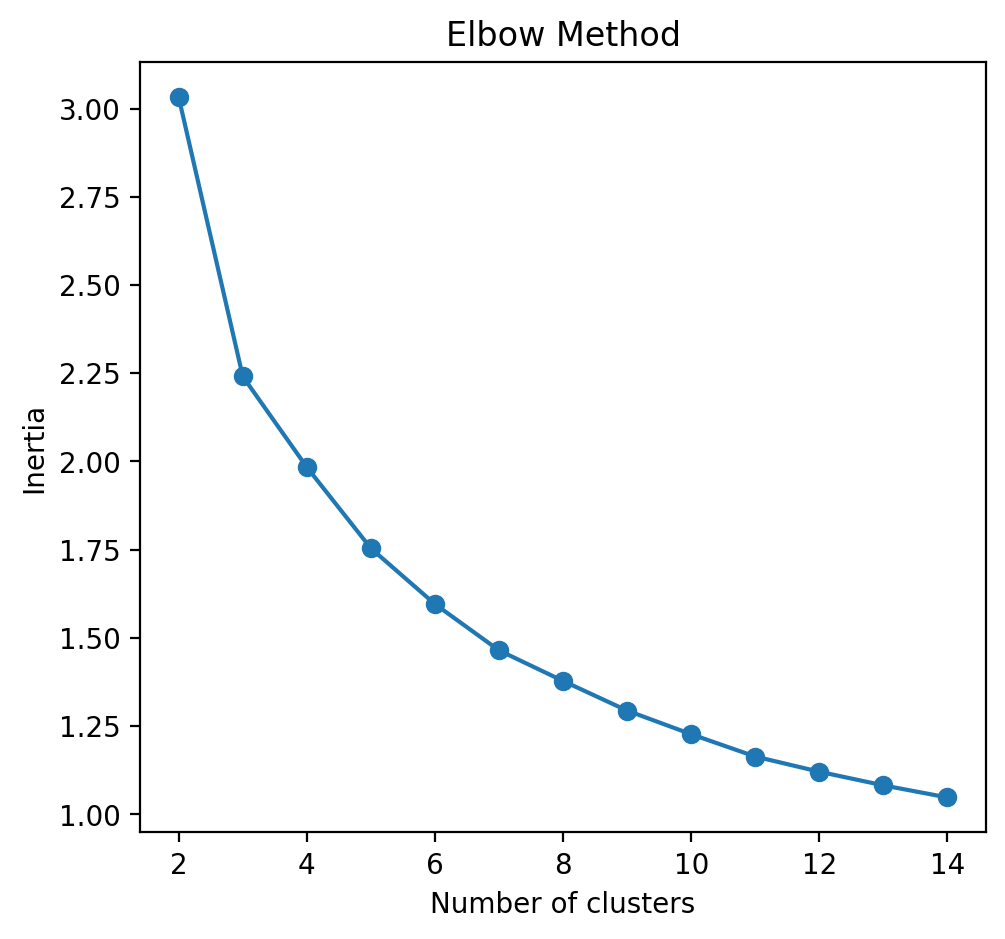

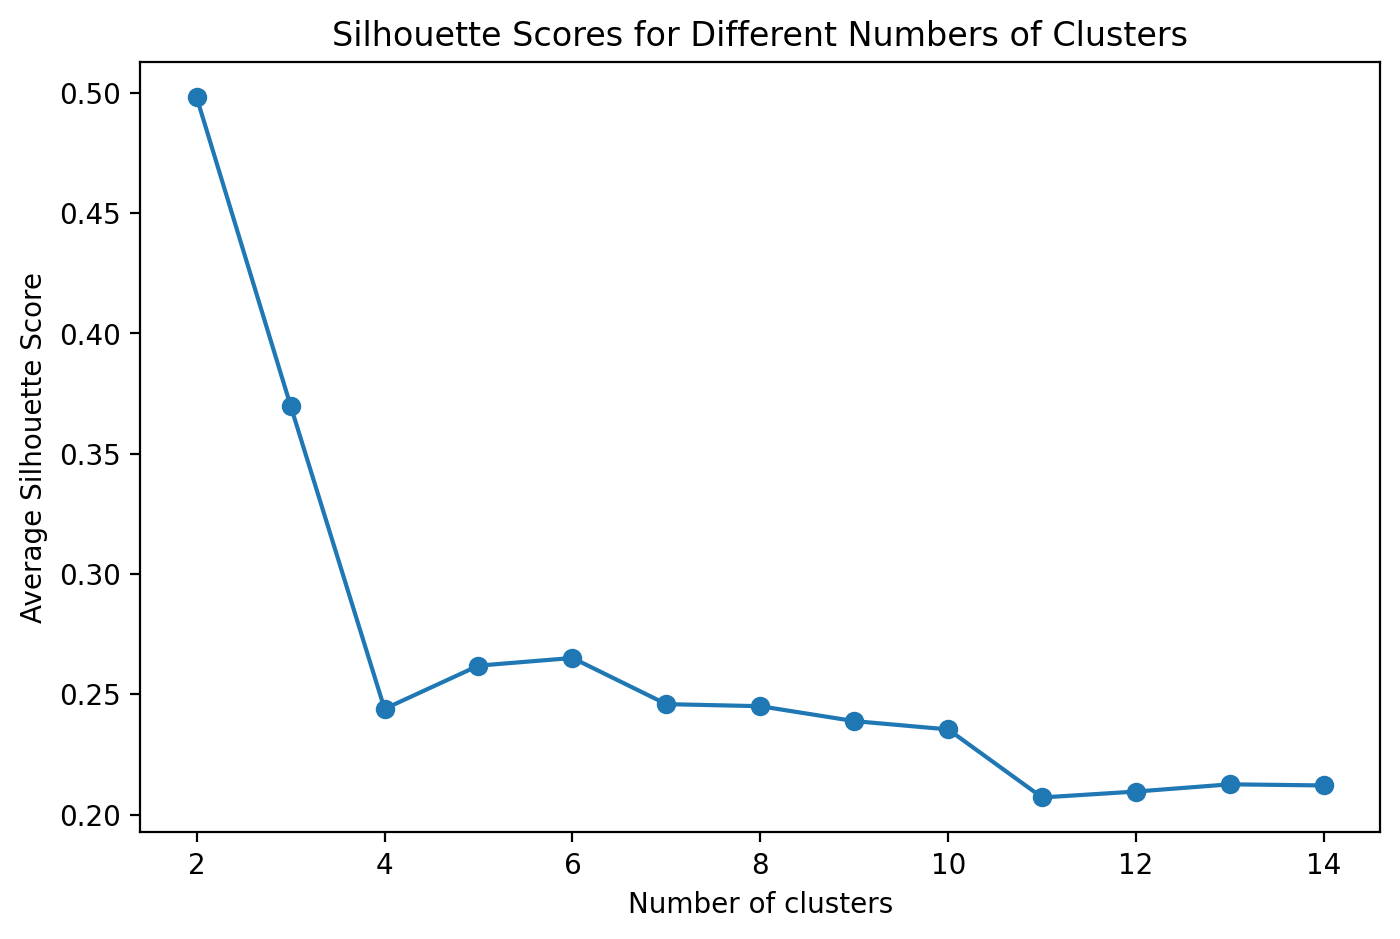

In [19]:
# try different initializations
plot_elbow_silhouette(X_pca, 10)

For n_clusters = 2, the average silhouette_score is : 0.498
For n_clusters = 3, the average silhouette_score is : 0.370
For n_clusters = 4, the average silhouette_score is : 0.245
For n_clusters = 5, the average silhouette_score is : 0.264
For n_clusters = 6, the average silhouette_score is : 0.264
For n_clusters = 7, the average silhouette_score is : 0.246
For n_clusters = 8, the average silhouette_score is : 0.244
For n_clusters = 9, the average silhouette_score is : 0.241
For n_clusters = 10, the average silhouette_score is : 0.238
For n_clusters = 11, the average silhouette_score is : 0.218
For n_clusters = 12, the average silhouette_score is : 0.208
For n_clusters = 13, the average silhouette_score is : 0.207
For n_clusters = 14, the average silhouette_score is : 0.217


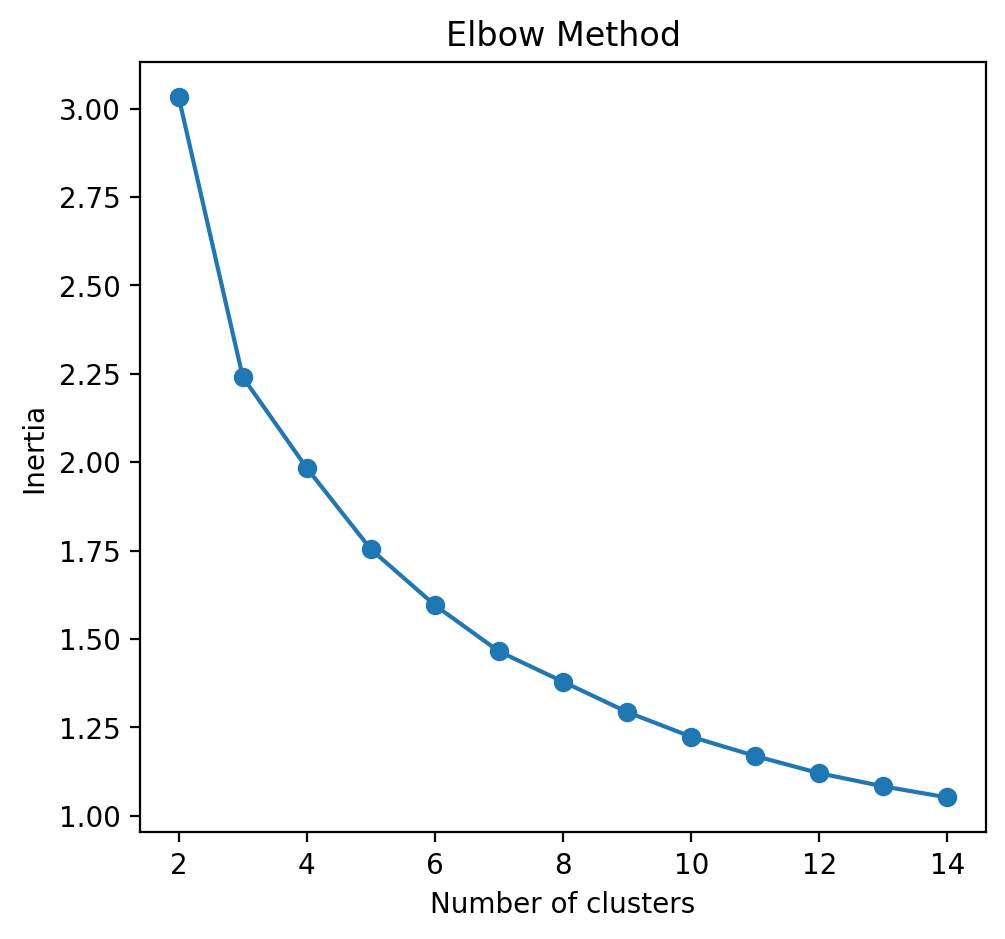

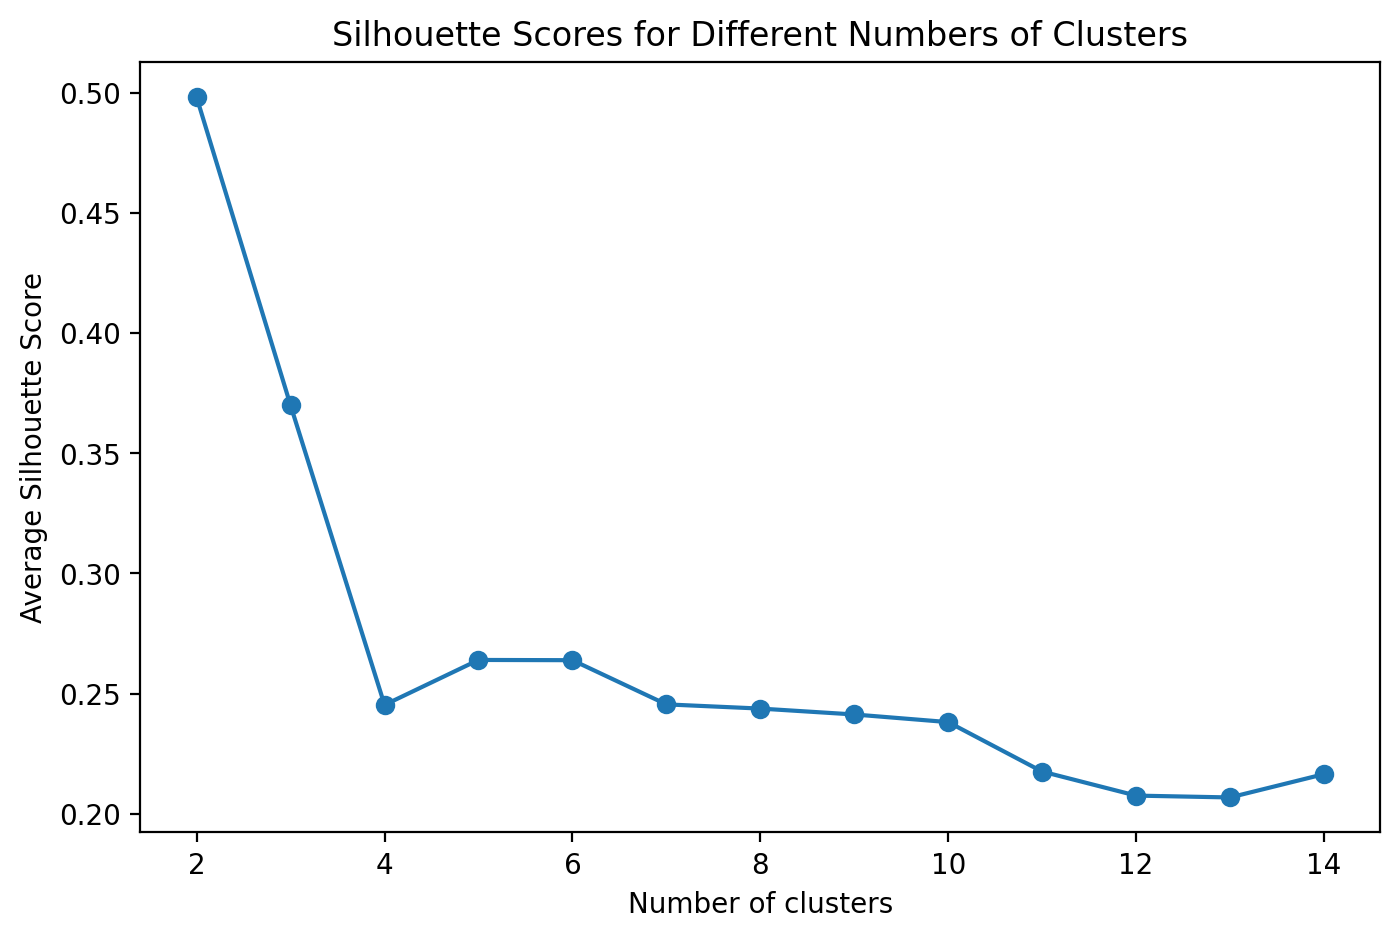

In [20]:
# try different initializations
plot_elbow_silhouette(X_pca, 13)

## Clustering Using KMedoids

In [21]:
from sklearn_extra.cluster import KMedoids


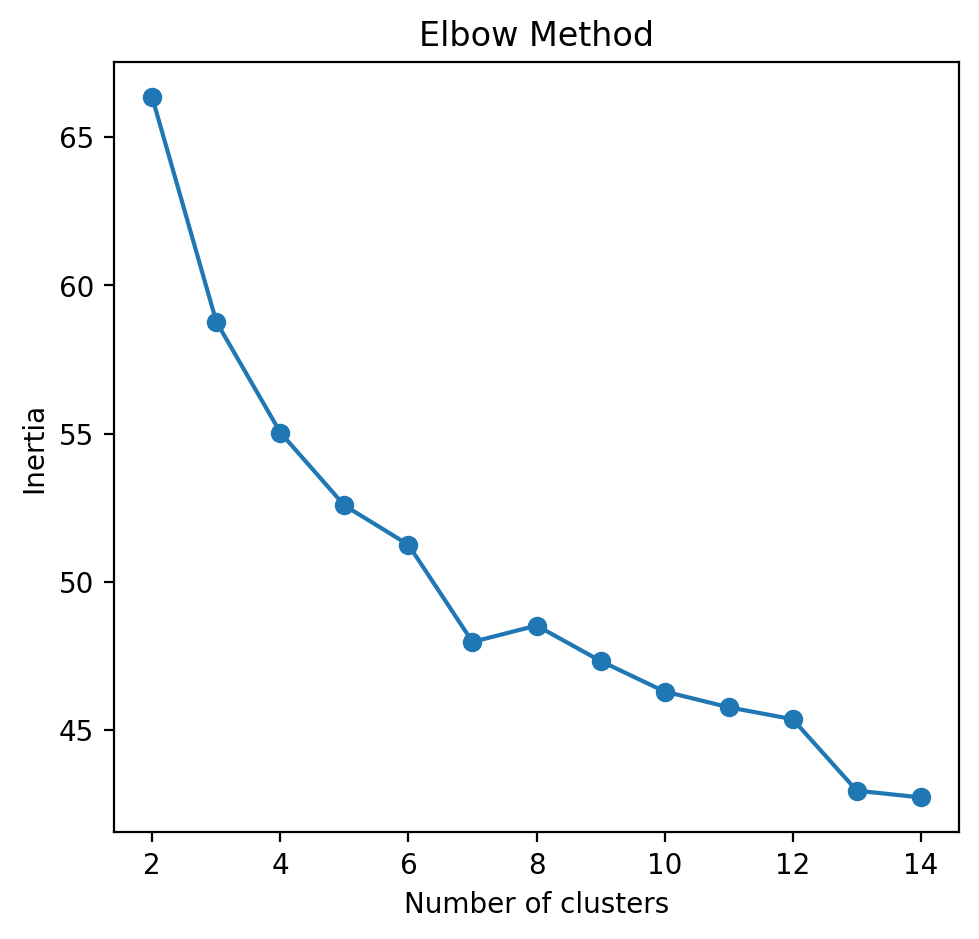

In [22]:
# Using the elbow method to find optimal k for K-means
inertia = []
range_n_clusters = range(2, 15)

for n_clusters in range_n_clusters:
    # K-means clustering
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmedoids.fit_predict(X_pca)
    
    # Inertia (for elbow method)
    inertia.append(kmedoids.inertia_)


# Plot elbow method results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [23]:
# K-means clustering
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, kmeans_labels)
    print(f'silhouette score when n={i} is {silhouette_avg}')



silhouette score when n=2 is 0.4980343108135345
silhouette score when n=3 is 0.37319301201946986
silhouette score when n=4 is 0.24622449231747479
silhouette score when n=5 is 0.26189994304198794
silhouette score when n=6 is 0.2504873296502363


In [24]:
# K-medoids clustering
for i in range(2, 7):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    kmedoids_labels = kmedoids.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, kmedoids_labels)
    print(f'silhouette score when n={i} is {silhouette_avg}')

silhouette score when n=2 is 0.40153642794692007
silhouette score when n=3 is 0.219609064602284
silhouette score when n=4 is 0.24982072071751613
silhouette score when n=5 is 0.1617627349534326
silhouette score when n=6 is 0.15219491607439745


To balance interpretability and cluster quality, we may choose between n_clusters = 3 or n_clusters = 5

In [25]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans3.fit(X_pca)
labels = kmeans3.labels_

pca_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca3 = pd.DataFrame(X_pca, columns=pca_columns)
df_pca3['cluster'] = labels
df_pca3

,PC1,PC2,PC3,PC4,PC5,PC6,cluster
0,0.008095,-0.009086,0.009830,0.005917,0.000569,-0.002091,1
1,-0.030120,0.003493,0.005755,-0.001799,-0.005365,0.001541,0
2,-0.062687,0.001418,-0.009185,0.002268,-0.000475,-0.000690,0
3,-0.051866,0.053882,0.041108,-0.027829,0.004835,0.003547,0
4,-0.043365,0.070216,0.044544,-0.023612,0.000289,0.000229,0
...,...,...,...,...,...,...,...
1904,-0.041380,-0.012371,-0.005678,0.002772,-0.002808,0.003077,0
1905,-0.061150,-0.006357,-0.012279,0.003193,-0.000873,-0.001403,0
1906,-0.025012,-0.016309,-0.001454,0.004155,0.003144,-0.002984,0
1907,-0.057426,0.000784,-0.014909,0.013344,-0.001318,-0.001076,0


In [26]:
pd.set_option('display.float_format', lambda x: f"{x:.4f}")

In [27]:
cluster_means = df_pca3.groupby('cluster').mean()
cluster_means
# it seems that some clusters are similar in quality

,PC1,PC2,PC3,PC4,PC5,PC6
cluster,,,,,,
0,-0.0289,0.0025,-0.0019,-0.0004,0.0003,0.0001
1,0.0223,-0.0083,0.0064,0.0003,-0.0012,-0.0003
2,0.1050,0.0113,-0.0088,0.0011,0.0019,0.0005


In [28]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
labels_5 = kmeans5.fit(X_pca)
labels = kmeans5.labels_

pca_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca5 = pd.DataFrame(X_pca, columns=pca_columns)
df_pca5['cluster'] = labels
df_pca5

,PC1,PC2,PC3,PC4,PC5,PC6,cluster
0,0.0081,-0.0091,0.0098,0.0059,0.0006,-0.0021,3
1,-0.0301,0.0035,0.0058,-0.0018,-0.0054,0.0015,0
2,-0.0627,0.0014,-0.0092,0.0023,-0.0005,-0.0007,0
3,-0.0519,0.0539,0.0411,-0.0278,0.0048,0.0035,1
4,-0.0434,0.0702,0.0445,-0.0236,0.0003,0.0002,1
...,...,...,...,...,...,...,...
1904,-0.0414,-0.0124,-0.0057,0.0028,-0.0028,0.0031,0
1905,-0.0612,-0.0064,-0.0123,0.0032,-0.0009,-0.0014,0
1906,-0.0250,-0.0163,-0.0015,0.0042,0.0031,-0.0030,3
1907,-0.0574,0.0008,-0.0149,0.0133,-0.0013,-0.0011,0


In [29]:
cluster_means = df_pca5.groupby('cluster').mean()
cluster_means

,PC1,PC2,PC3,PC4,PC5,PC6
cluster,,,,,,
0,-0.0394,0.0026,-0.0051,0.0006,0.0007,0.0001
1,-0.0132,0.0337,0.0199,-0.0089,-0.0004,0.0002
2,0.1082,0.0143,-0.0114,0.0009,0.0021,0.0004
3,-0.0085,-0.0073,-0.0015,0.0008,-0.0006,-0.0006
4,0.0351,-0.0128,0.0077,0.0009,-0.0010,0.0005


## Analysis: Interpretating Clusters

To better understand what these clusters represent, I will conduct additional exploratory analysis in this section by generating graphs to look at how the clusters indicate patterns in the original data for clustering. 

In [30]:
df_18 = df_18.reset_index(drop=True)
df_18

,pop,hh,state,county,tract,FIPS,year,rail,total_li,pctch_real_mhval_sl,...,prop_hhinc_50000,prop_hhinc_60000,prop_hhinc_75000,prop_hhinc_100000,prop_hhinc_125000,prop_hhinc_150000,prop_hhinc_200000,prop_hhinc_201000,prop_bd,prop_grad
0,2344.0000,866.0000,17,197,882900,17197882900,2018,0.0000,259.0000,0.0104,...,0.0566,0.0508,0.1178,0.1328,0.0924,0.0497,0.0266,0.0254,0.0418,0.0299
1,3759.0000,1183.0000,17,197,883000,17197883000,2018,0.0000,438.0000,0.1278,...,0.0600,0.1386,0.0904,0.0659,0.0583,0.0499,0.0516,0.0051,0.0447,0.0258
2,3726.0000,1099.0000,17,197,880111,17197880111,2018,0.0000,104.0000,0.0907,...,0.0582,0.0355,0.1237,0.2721,0.1401,0.0692,0.0437,0.0155,0.1178,0.0357
3,5692.0000,2429.0000,17,197,883602,17197883602,2018,0.0000,310.0000,-0.1736,...,0.0366,0.1140,0.2248,0.0926,0.0926,0.1075,0.1087,0.0391,0.1235,0.0676
4,2756.0000,1439.0000,17,197,883803,17197883803,2018,0.0000,652.0000,-0.0056,...,0.0612,0.0799,0.1237,0.0834,0.0118,0.0653,0.0132,0.0049,0.0991,0.0483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,3943.0000,1056.0000,17,31,301701,17031301701,2018,0.0000,559.0000,0.0972,...,0.0123,0.0919,0.0814,0.0218,0.1051,0.0114,0.0303,0.0000,0.0373,0.0119
1905,4387.0000,1089.0000,17,31,301702,17031301702,2018,0.0000,470.0000,-0.0665,...,0.0790,0.0900,0.0670,0.1001,0.0634,0.0083,0.0156,0.0083,0.0246,0.0050
1906,3625.0000,1052.0000,17,31,301801,17031301801,2018,1.0000,537.0000,0.0772,...,0.0000,0.0741,0.0741,0.0798,0.0380,0.0846,0.0000,0.0000,0.0411,0.0135
1907,3509.0000,866.0000,17,31,301802,17031301802,2018,1.0000,406.0000,-0.0823,...,0.0381,0.1016,0.0566,0.1143,0.0393,0.0139,0.0127,0.0000,0.0493,0.0071


In [31]:
df_18_cluster = pd.merge(df_18, df_pca5[['cluster']], left_index=True,right_index=True, how='left')
df_18_cluster

,pop,hh,state,county,tract,FIPS,year,rail,total_li,pctch_real_mhval_sl,...,prop_hhinc_60000,prop_hhinc_75000,prop_hhinc_100000,prop_hhinc_125000,prop_hhinc_150000,prop_hhinc_200000,prop_hhinc_201000,prop_bd,prop_grad,cluster
0,2344.0000,866.0000,17,197,882900,17197882900,2018,0.0000,259.0000,0.0104,...,0.0508,0.1178,0.1328,0.0924,0.0497,0.0266,0.0254,0.0418,0.0299,3
1,3759.0000,1183.0000,17,197,883000,17197883000,2018,0.0000,438.0000,0.1278,...,0.1386,0.0904,0.0659,0.0583,0.0499,0.0516,0.0051,0.0447,0.0258,0
2,3726.0000,1099.0000,17,197,880111,17197880111,2018,0.0000,104.0000,0.0907,...,0.0355,0.1237,0.2721,0.1401,0.0692,0.0437,0.0155,0.1178,0.0357,0
3,5692.0000,2429.0000,17,197,883602,17197883602,2018,0.0000,310.0000,-0.1736,...,0.1140,0.2248,0.0926,0.0926,0.1075,0.1087,0.0391,0.1235,0.0676,1
4,2756.0000,1439.0000,17,197,883803,17197883803,2018,0.0000,652.0000,-0.0056,...,0.0799,0.1237,0.0834,0.0118,0.0653,0.0132,0.0049,0.0991,0.0483,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,3943.0000,1056.0000,17,31,301701,17031301701,2018,0.0000,559.0000,0.0972,...,0.0919,0.0814,0.0218,0.1051,0.0114,0.0303,0.0000,0.0373,0.0119,0
1905,4387.0000,1089.0000,17,31,301702,17031301702,2018,0.0000,470.0000,-0.0665,...,0.0900,0.0670,0.1001,0.0634,0.0083,0.0156,0.0083,0.0246,0.0050,0
1906,3625.0000,1052.0000,17,31,301801,17031301801,2018,1.0000,537.0000,0.0772,...,0.0741,0.0741,0.0798,0.0380,0.0846,0.0000,0.0000,0.0411,0.0135,3
1907,3509.0000,866.0000,17,31,301802,17031301802,2018,1.0000,406.0000,-0.0823,...,0.1016,0.0566,0.1143,0.0393,0.0139,0.0127,0.0000,0.0493,0.0071,0


In [32]:
to_sum = ['prop_mov_low_inc', 'prop_mov_med_inc', 'prop_mov_high_inc', 'prop_mov_wc_w_income', 'prop_mov_oc_w_income', 'prop_mov_os_w_income',
       'prop_mov_fa_w_income', 'cluster']
df_to_sum = df_18_cluster[to_sum]
cluster_summary = df_to_sum.groupby('cluster').mean()
cluster_summary

,prop_mov_low_inc,prop_mov_med_inc,prop_mov_high_inc,prop_mov_wc_w_income,prop_mov_oc_w_income,prop_mov_os_w_income,prop_mov_fa_w_income
cluster,,,,,,,
0,0.0173,0.0155,0.0106,0.0242,0.0112,0.0058,0.0022
1,0.0483,0.0460,0.0232,0.0468,0.0492,0.0162,0.0054
2,0.0734,0.0843,0.0702,0.1548,0.0163,0.0471,0.0097
3,0.0325,0.0264,0.0115,0.0543,0.0066,0.0071,0.0024
4,0.0595,0.0425,0.0180,0.0957,0.0083,0.0120,0.0038


In [33]:
cluster_summary = cluster_summary.reset_index()
cluster_summary

,cluster,prop_mov_low_inc,prop_mov_med_inc,prop_mov_high_inc,prop_mov_wc_w_income,prop_mov_oc_w_income,prop_mov_os_w_income,prop_mov_fa_w_income
0,0,0.0173,0.0155,0.0106,0.0242,0.0112,0.0058,0.0022
1,1,0.0483,0.0460,0.0232,0.0468,0.0492,0.0162,0.0054
2,2,0.0734,0.0843,0.0702,0.1548,0.0163,0.0471,0.0097
3,3,0.0325,0.0264,0.0115,0.0543,0.0066,0.0071,0.0024
4,4,0.0595,0.0425,0.0180,0.0957,0.0083,0.0120,0.0038


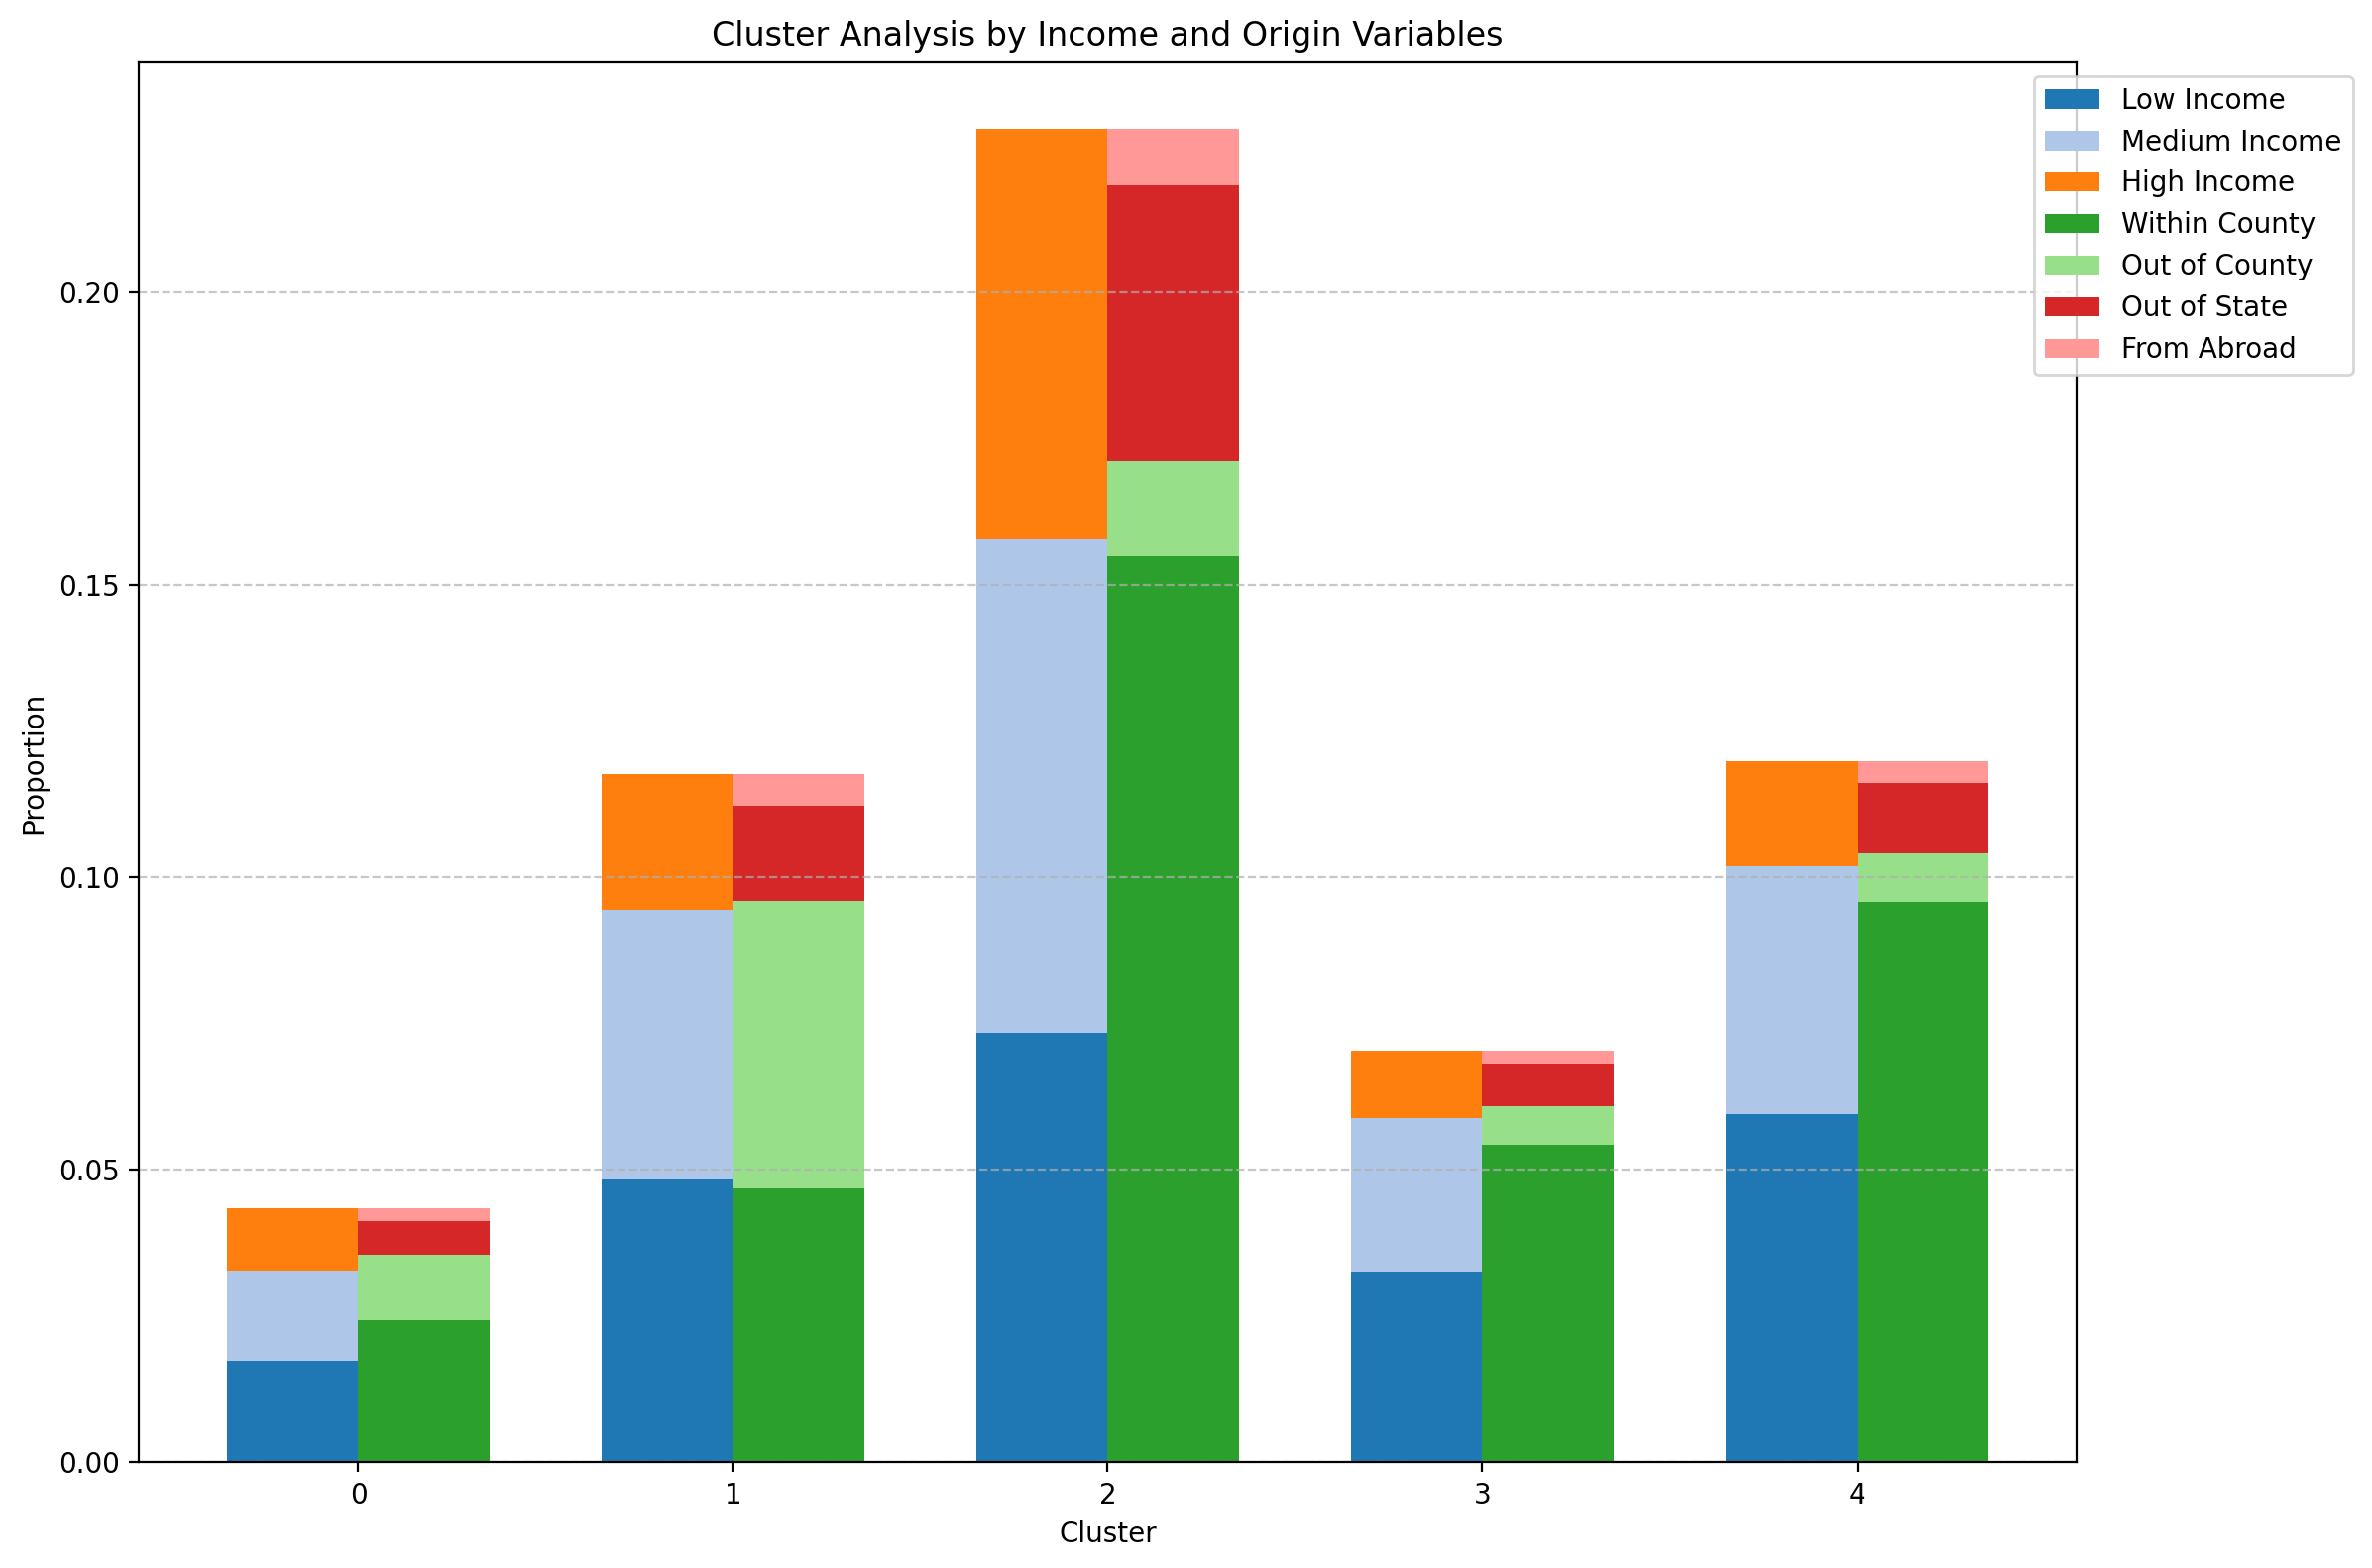

In [43]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Define width of bars and positions
width = 0.35
x = np.arange(len(cluster_summary))

# Group income variables
income_vars = ['prop_mov_low_inc', 'prop_mov_med_inc', 'prop_mov_high_inc']
inc_lab = ['Low Income', 'Medium Income', 'High Income']
income_data = cluster_summary[income_vars].values
income_bottom = np.zeros(len(cluster_summary))

# Group origin variables
origin_vars = ['prop_mov_wc_w_income', 'prop_mov_oc_w_income', 
               'prop_mov_os_w_income', 'prop_mov_fa_w_income']
origin_lab = ['Within County', 'Out of County', 'Out of State', 'From Abroad']
origin_data = cluster_summary[origin_vars].values
origin_bottom = np.zeros(len(cluster_summary))

# Plot income variables (left bars)
income_colors = ['#1f77b4', '#aec7e8', '#ff7f0e']
income_bars = []
for i, var in enumerate(income_vars):
    bar = ax.bar(x - width/2, cluster_summary[var], width, 
                 bottom=income_bottom, label=inc_lab[i], color=income_colors[i])
    income_bars.append(bar)
    income_bottom += cluster_summary[var].values

# Plot origin variables (right bars)
origin_colors = ['#2ca02c', '#98df8a', '#d62728', '#ff9896']
origin_bars = []
for i, var in enumerate(origin_vars):
    bar = ax.bar(x + width/2, cluster_summary[var], width, 
                 bottom=origin_bottom, label=origin_lab[i], color=origin_colors[i])
    origin_bars.append(bar)
    origin_bottom += cluster_summary[var].values

# Add labels, title and legend
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')
ax.set_title('Cluster Analysis by Income and Origin Variables')
ax.set_xticks(x)
ax.set_xticklabels(cluster_summary['cluster'])
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Add a horizontal line to separate groups visually
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

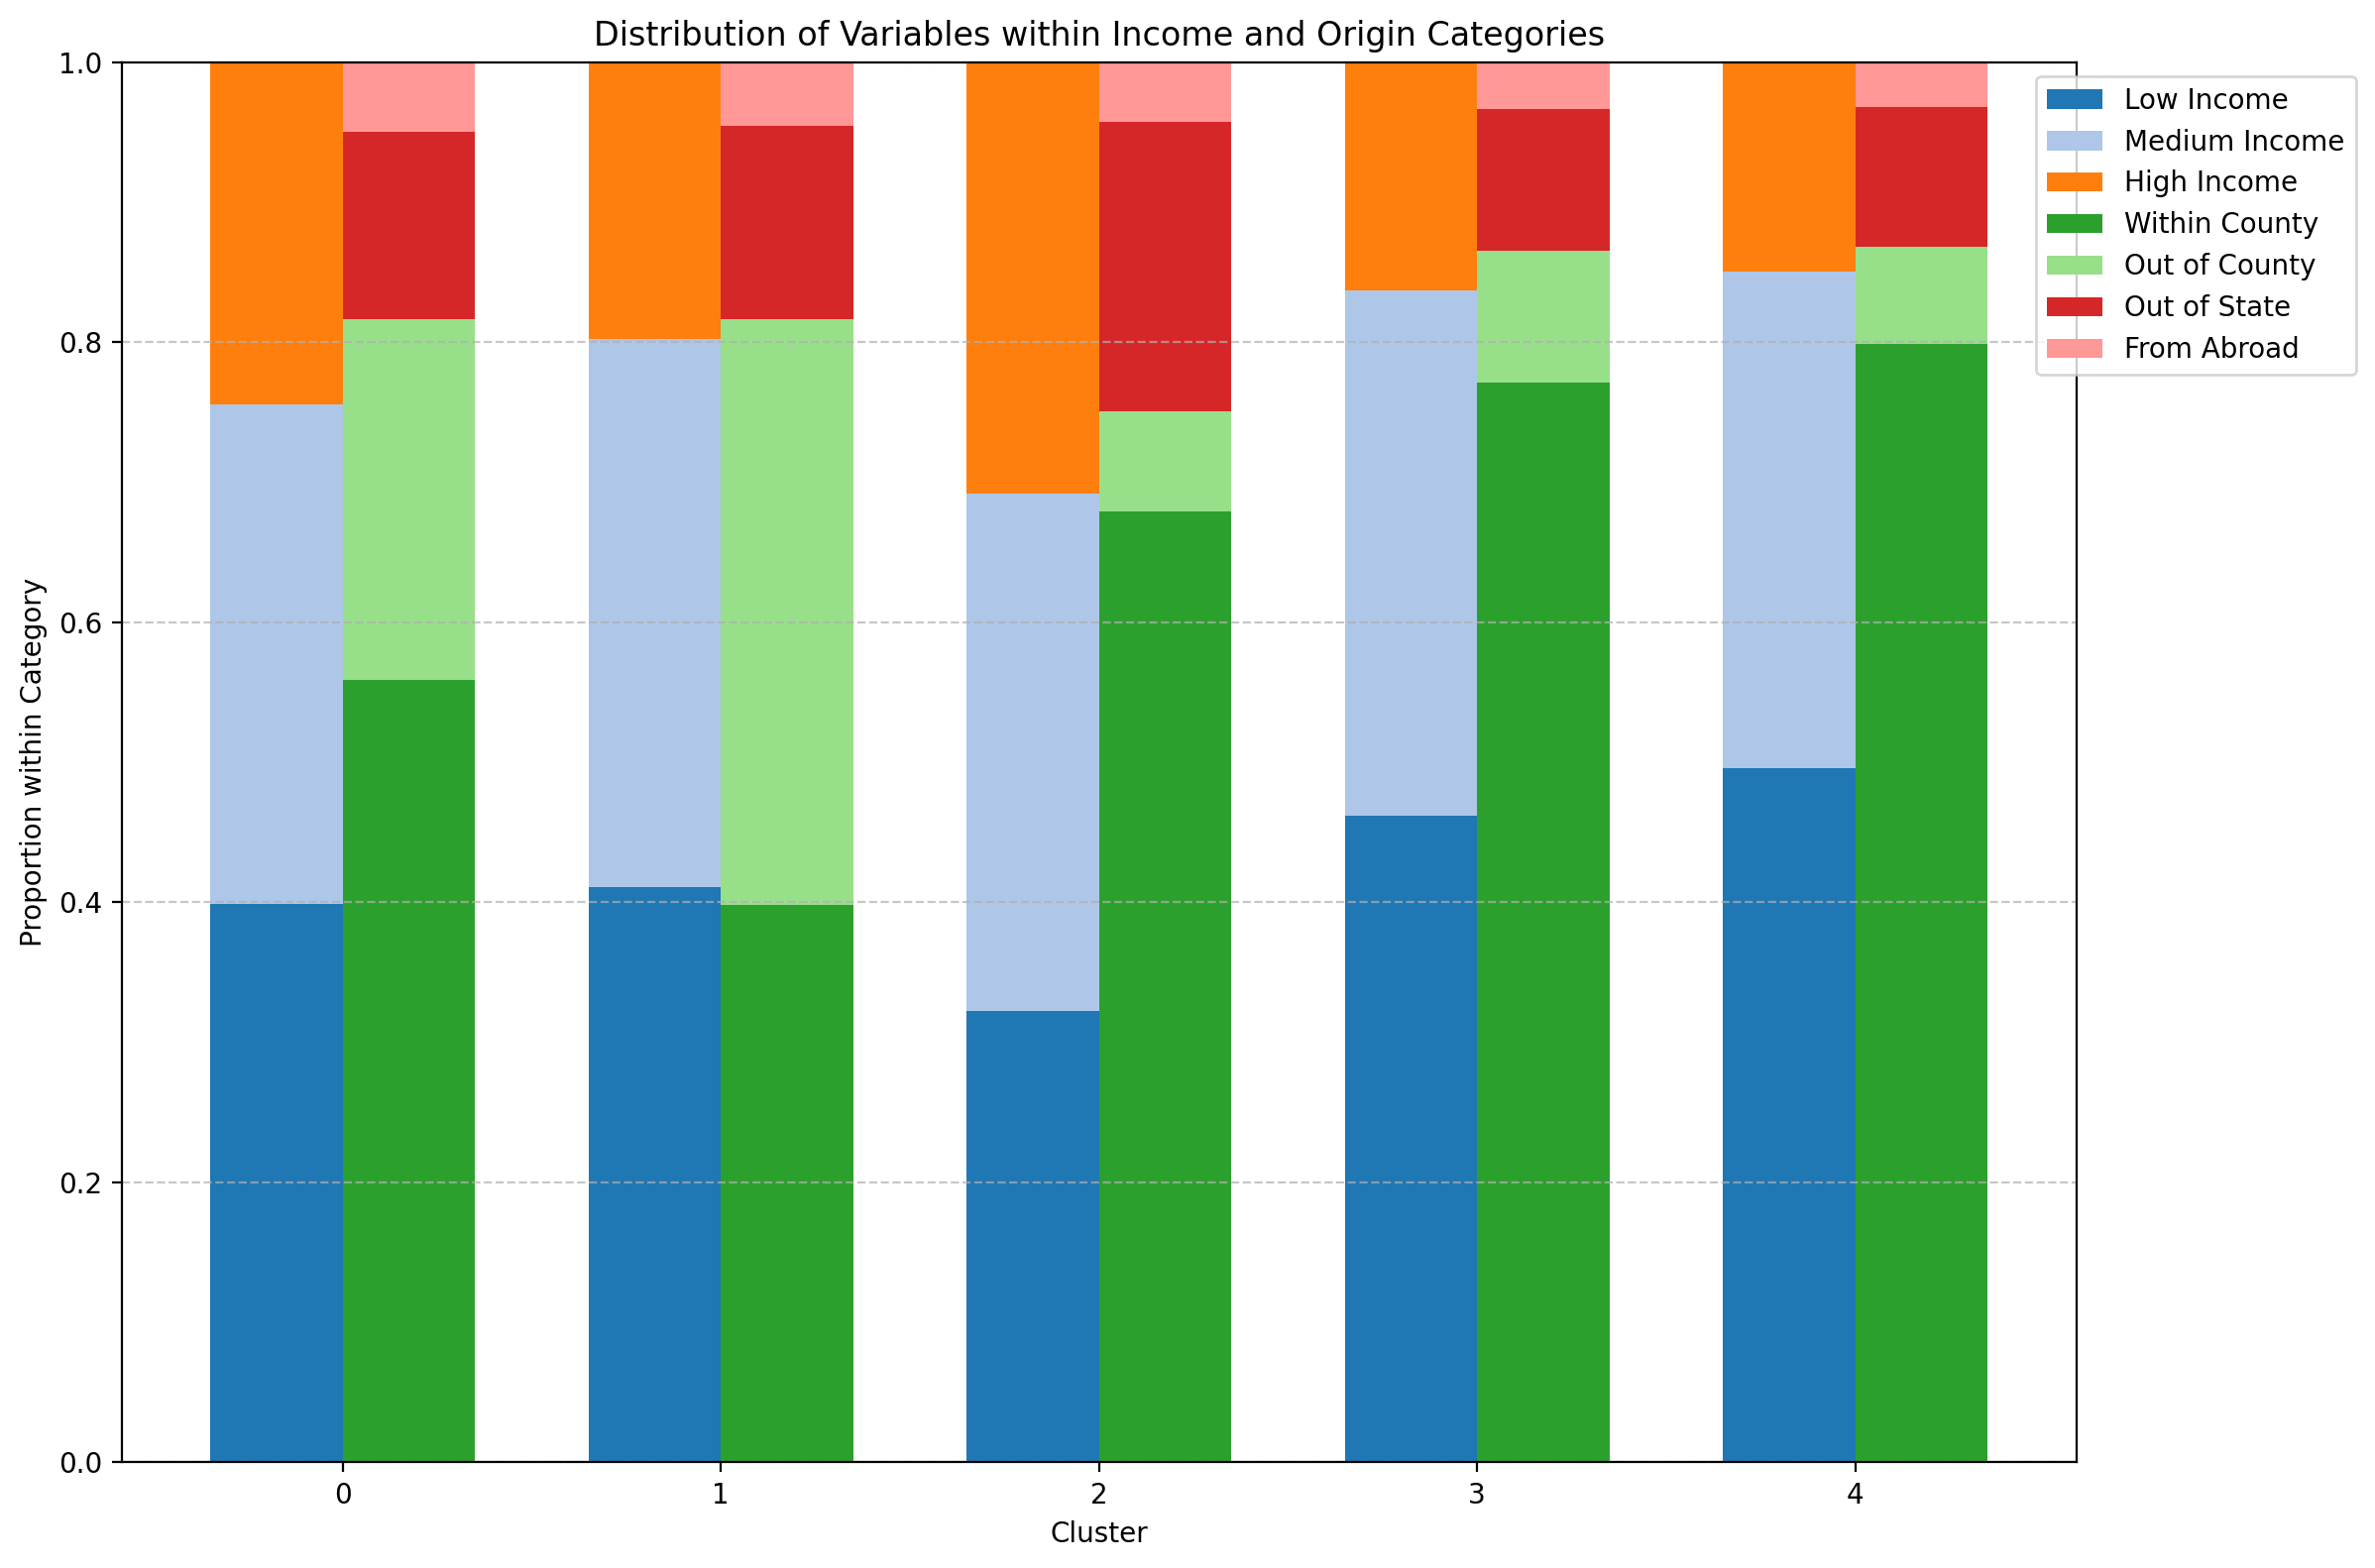

In [45]:
# Create a proportion dataframe
proportion_df = cluster_summary.copy()

# Calculate proportions within income variables
for idx in proportion_df.index:
    income_total = proportion_df.loc[idx, income_vars].sum()
    if income_total > 0:
        proportion_df.loc[idx, income_vars] = proportion_df.loc[idx, income_vars] / income_total

# Calculate proportions within origin variables
for idx in proportion_df.index:
    origin_total = proportion_df.loc[idx, origin_vars].sum()
    if origin_total > 0:
        proportion_df.loc[idx, origin_vars] = proportion_df.loc[idx, origin_vars] / origin_total

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Define width of bars and positions
width = 0.35
x = np.arange(len(proportion_df))

# Plot income variables proportions (left bars)
income_colors = ['#1f77b4', '#aec7e8', '#ff7f0e']
income_bottom = np.zeros(len(proportion_df))
for i, var in enumerate(income_vars):
    bar = ax.bar(x - width/2, proportion_df[var], width, 
                 bottom=income_bottom, label=inc_lab[i], 
                 color=income_colors[i])
    income_bottom += proportion_df[var].values

# Plot origin variables proportions (right bars)
origin_colors = ['#2ca02c', '#98df8a', '#d62728', '#ff9896']
origin_bottom = np.zeros(len(proportion_df))
for i, var in enumerate(origin_vars):
    bar = ax.bar(x + width/2, proportion_df[var], width, 
                 bottom=origin_bottom, label=origin_lab[i], 
                 color=origin_colors[i])
    origin_bottom += proportion_df[var].values

# Add labels, title and legend
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion within Category')
ax.set_title('Distribution of Variables within Income and Origin Categories')
ax.set_xticks(x)
ax.set_xticklabels(proportion_df['cluster'])
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure bars sum to 1
ax.set_ylim(0, 1.0)

plt.tight_layout()
plt.show()

Combine the two graphs, we can generalize labels for each cluster:
- 0 - minimal inflow, attracts extreme population
- 1 - moderate inflow, external working-class magnet
- 2 - high inflow, internal high-income magnet
- 3 - low inflow, attracts internal working-class
- 4 - moderate inflow, internal working-class magnet

In [36]:
df_18_cluster.to_csv('df_18_cluster.csv', index=False)